# Análisis Exploratorio de Datos (EDA) en Evaluaciones Agropecuarias Municipales de Colombia
En este notebook realizaremos un análisis exploratorio de datos (EDA) sobre las evaluaciones agropecuarias municipales en Colombia, abarcando el período 2007-2018. Nuestro objetivo es obtener una comprensión profunda de los datos, identificando patrones, tendencias y relaciones clave que puedan aportar valor en la toma de decisiones en el sector agrícola.

Contenido del Notebook

1.   Importación de librerías y carga de datos
2.   Primeras observaciones y descripción del dataset
3.   Análisis de datos faltantes y tratamiento de valores nulos
4.   Identificación del cultivo con mayor rendimiento por departamento
5.   Análisis de tendencias temporales en la producción agrícola
6.   Correlación entre variables continuas y su impacto en la producción
7.   Identificación de los cultivos con mayor producción por departamento
8.   Comparación entre área cultivada y área sembrada


Este análisis nos permitirá obtener información relevante sobre el comportamiento de la producción agrícola en Colombia y su evolución a lo largo del tiempo.

Dataset

El dataset está disponible en la página de datos abiertos del Estado colombiano, donde se publican los datos generados por las entidades públicas de manera abierta. Esto permite que la ciudadanía y los grupos de interés accedan a la información y la utilicen para su análisis y procesamiento.

[link.](https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Evaluaciones-Agropecuarias-Municipales-EVA/2pnw-mmge/about_data)



# Importación de librerías y carga de datos

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Subir los datos
Datos = pd.read_csv("/content/Evaluaciones_Agropecuarias_Municipales_EVA_20250215.csv")
#Mostrar los datos
Datos

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


# Primeras observaciones y descripción del dataset
Es crucial realizar una exploración inicial de los datos para identificar las variables del dataset, sus tipos y la disponibilidad de valores en cada una. Además, es importante analizar las principales medidas descriptivas, la presencia de valores nulos y atípicos, y las matrices de correlación. Este análisis permite comprender el estado general de los datos, anticipar la complejidad del procesamiento y evaluar su relación con el contexto de estudio.


In [3]:
def EDA(df):
  # Display dataframe info
  print("Information about dataframe")
  df_info = df.info()
  display(df_info)
  print("......")
  print("\n")

  # Display the number of duplicate values in each column
  print("Number of duplicated rows in the DataFrame:")
  duplicate_counts = df.duplicated().sum()
  print(duplicate_counts)
  print(".....\n")

  # Display the number of missing datapoints in each column
  print("Number of missing data in each column")
  missing_data = df.isnull().sum()
  display(missing_data)
  print(duplicate_counts)
  print(".....\n")

  # Display the outliers in each column using de IQR technique
  print("outliers in each column")
  outliers = {}
  for column in df.select_dtypes(include=["number"]).columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
  display(outliers)
  print(".....")
  print("\n")

  # Display de basic statistics or the dataframe
  print("Basic statistics")
  display(df.describe().T)
  print(".....\n")

  # Display column-wise sumary in a table
  print("Column-wise sumary")
  summary_data = []
  for column in df.columns:
    column_sumary = {
        "Column Name": column,
        "Data Type" : df[column].dtype,
        "Missing Values": df[column].isnull().sum(),
        "Unique Values": df[column].nunique(),
        "Outliers" : outliers.get(column,0) if df[column].dtype in ['int64', 'float64'] else "N/A",
        "Top 5 Values" : df[column].value_counts().head().to_dict() if df[column].dtype == 'object' else "N/A"
        }
    summary_data.append(column_sumary)
  summary_df = pd.DataFrame(summary_data)
  display(summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))
  print(".....")
  print("\n")

  # Display correlation matrix for numerical features only
  print("Correlation matrix of numerical feature")
  numerical_df = df.select_dtypes(include=["number"])
  display(numerical_df.corr())
  print(".....")
  print("\n")



In [4]:
EDA(Datos)

Information about dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. 
DEP.                                     206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO 
DE CULTIVO                              206068 non-null  object 
 5   SUBGRUPO 
DE CULTIVO                           206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO  

None

......


Number of duplicated rows in the DataFrame:
0
.....

Number of missing data in each column


,0
CÓD. \nDEP.,0
DEPARTAMENTO,0
CÓD. MUN.,0
MUNICIPIO,1
GRUPO \nDE CULTIVO,0
SUBGRUPO \nDE CULTIVO,0
CULTIVO,0
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,0
AÑO,0
PERIODO,0


0
.....

outliers in each column


{'CÓD. \nDEP.': 0,
 'CÓD. MUN.': 0,
 'AÑO': 0,
 'Área Sembrada\n(ha)': 30154,
 'Área Cosechada\n(ha)': 29763,
 'Producción\n(t)': 29598,
 'Rendimiento\n(t/ha)': 11324}

.....


Basic statistics


,count,mean,std,min,25%,50%,75%,max
CÓD. \nDEP.,206068.0,40.322563,25.278662,5.00,17.0,41.0,68.00,99.0
CÓD. MUN.,206068.0,40747.534066,25256.621906,5001.00,17524.0,41357.0,68001.00,99773.0
AÑO,206068.0,2012.455976,3.479113,2006.00,2009.0,2013.0,2015.00,2018.0
Área Sembrada\n(ha),206068.0,291.073825,1153.602556,0.00,10.0,35.0,151.00,47403.0
Área Cosechada\n(ha),206068.0,249.419522,980.375226,0.00,8.0,30.0,130.00,38600.0
Producción\n(t),206068.0,2790.725595,45114.713321,0.00,32.0,140.0,648.00,4546116.0
Rendimiento\n(t/ha),202635.0,9.238820,14.888659,0.03,1.5,5.0,11.23,246.0


.....

Column-wise sumary


,Column Name,Data Type,Missing Values,Unique Values,Outliers,Top 5 Values
0,CÓD. DEP.,int64,0,32,0,N/A
1,DEPARTAMENTO,object,0,32,N/A,"{'BOYACA': 20576, 'ANTIOQUIA': 18759, 'CUNDINAMARCA': 17805, 'HUILA': 15926, 'VALLE DEL CAUCA': 15774}"
2,CÓD. MUN.,int64,0,1105,0,N/A
3,MUNICIPIO,object,1,1018,N/A,"{'BOLIVAR': 1012, 'LA UNION': 916, 'SAN PEDRO': 915, 'BUENAVISTA': 859, 'GUADALUPE': 727}"
4,GRUPO DE CULTIVO,object,0,13,N/A,"{'FRUTALES': 50236, 'CEREALES': 36045, 'HORTALIZAS': 32032, 'TUBERCULOS Y PLATANOS': 30664, 'LEGUMINOSAS': 26368}"
5,SUBGRUPO DE CULTIVO,object,0,120,N/A,"{'MAIZ': 24965, 'FRIJOL': 14693, 'TOMATE': 9654, 'YUCA': 9488, 'PLATANO': 9048}"
6,CULTIVO,object,0,223,N/A,"{'MAIZ': 24965, 'FRIJOL': 14693, 'TOMATE': 9654, 'YUCA': 9488, 'PLATANO': 9048}"
7,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,object,0,271,N/A,"{'MAIZ TRADICIONAL': 20069, 'FRIJOL': 10776, 'YUCA': 9284, 'PLATANO': 8876, 'TOMATE': 7598}"
8,AÑO,int64,0,13,0,N/A
9,PERIODO,object,0,36,N/A,"{'2018': 8901, '2017': 8899, '2016': 8681, '2015': 8487, '2014': 8332}"


.....


Correlation matrix of numerical feature


,CÓD. \nDEP.,CÓD. MUN.,AÑO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha)
CÓD. \nDEP.,1.000000,0.999945,-0.017639,0.036321,0.037425,0.029980,0.006613
CÓD. MUN.,0.999945,1.000000,-0.017569,0.036307,0.037392,0.030007,0.006694
AÑO,-0.017639,-0.017569,1.000000,0.009182,0.008350,0.005393,0.025042
Área Sembrada\n(ha),0.036321,0.036307,0.009182,1.000000,0.976907,0.444499,0.035638
Área Cosechada\n(ha),0.037425,0.037392,0.008350,0.976907,1.000000,0.444894,0.033636
Producción\n(t),0.029980,0.030007,0.005393,0.444499,0.444894,1.000000,0.247974
Rendimiento\n(t/ha),0.006613,0.006694,0.025042,0.035638,0.033636,0.247974,1.000000


.....




# Análisis de datos faltantes y tratamiento de valores nulos

**Primer analisis.**

El cuadro de datos faltantes por variable muestra la ausencia de valores en 'Rendimiento (t/ha)' y 'Nombre Científico'. Se recomienda revisar estas variables en detalle antes de continuar con el análisis.

In [40]:
# Calcular la cantidad de valores nulos en cada columna del DataFrame
missing_data = Datos.isnull().sum()

# Calcular el porcentaje de valores nulos con respecto al total de filas
missing_percent = (missing_data / len(Datos)) * 100

# Crear un DataFrame con la cantidad y el porcentaje de valores nulos por columna
missing_df = pd.DataFrame({'Missing Data': missing_data, 'Missing Percent': missing_percent})

# Filtrar solo las columnas que tienen valores nulos
missing_df[missing_df['Missing Data'] > 0]

,Missing Data,Missing Percent
MUNICIPIO,1,0.000485
Rendimiento\n(t/ha),3433,1.665955
NOMBRE \nCIENTIFICO,2857,1.386436


Valores faltantes en grafico
.....



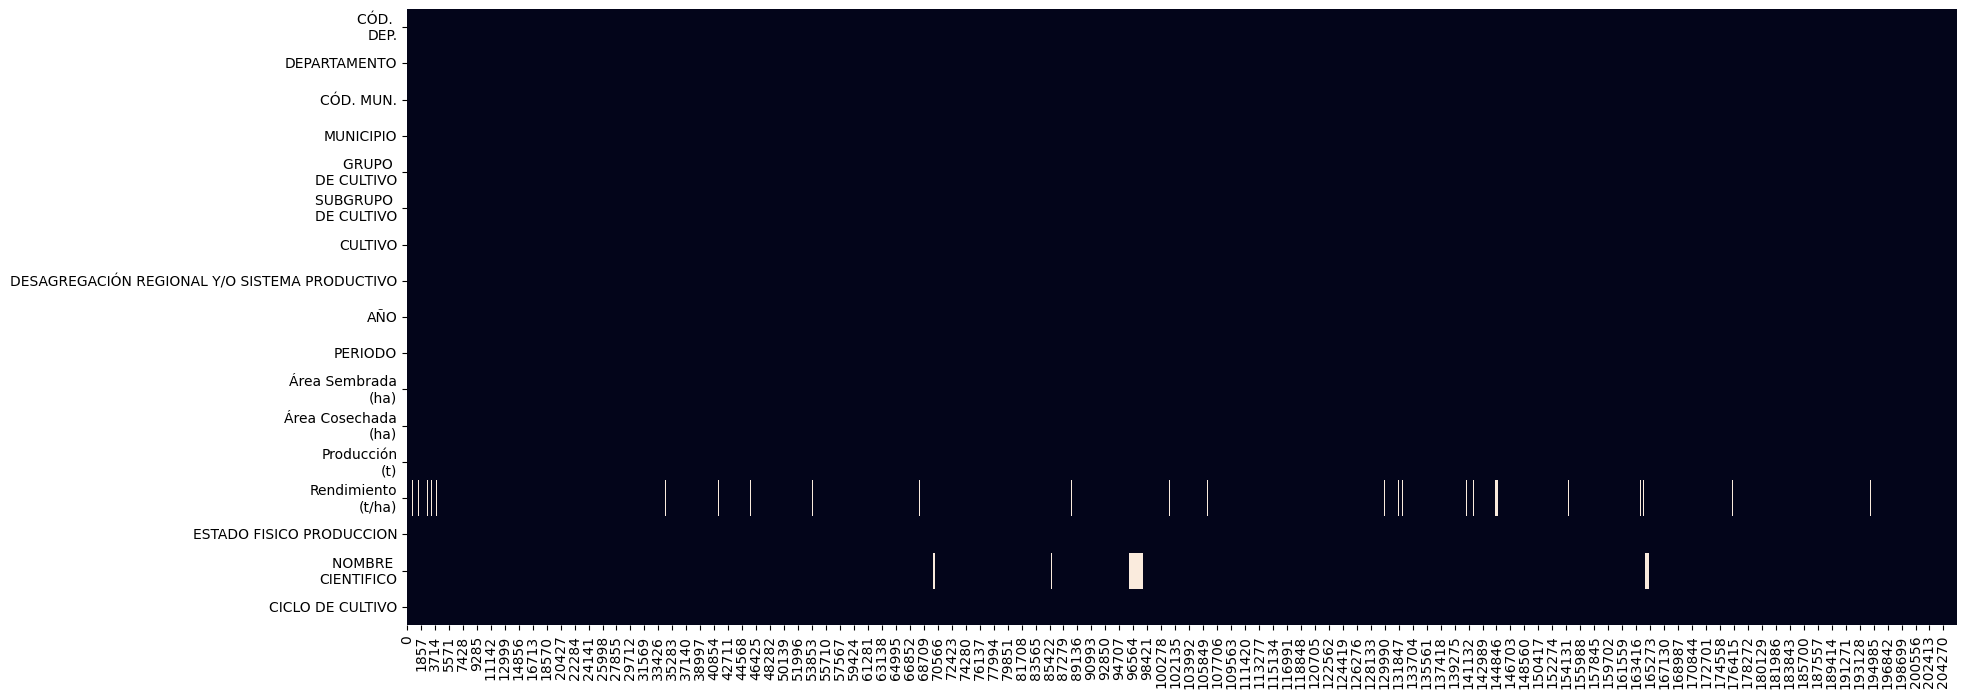

In [6]:
  # Valores faltantes representados en el gráfico.
  print("Valores faltantes en grafico")
  plt.figure(figsize=(20, len(Datos.columns) // 2))
  Datos.isnull().transpose().pipe(lambda Datos:(sns.heatmap(data=Datos,cbar=False)))
  print(".....\n")

In [7]:
#Filas con valores nulos
Datos[Datos['Rendimiento\n(t/ha)'].isnull()]

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
251,27,CHOCO,27250,LITORAL DEL SAN JUAN,TUBERCULOS Y PLATANOS,MALANGA,MALANGA,ACHIN,2010,2010,500,0,0,NaN,TUBERCULO FRESCO,COLOCASIA ESCULENTA,ANUAL
254,27,CHOCO,27150,CARMEN DEL DARIEN,TUBERCULOS Y PLATANOS,MALANGA,MALANGA,ACHIN,2010,2010,70,0,0,NaN,TUBERCULO FRESCO,COLOCASIA ESCULENTA,ANUAL
264,27,CHOCO,27430,MEDIO BAUDO,TUBERCULOS Y PLATANOS,MALANGA,MALANGA,ACHIN,2010,2010,5,0,0,NaN,TUBERCULO FRESCO,COLOCASIA ESCULENTA,ANUAL
265,27,CHOCO,27135,EL CANTON DEL SAN PABLO,TUBERCULOS Y PLATANOS,MALANGA,MALANGA,ACHIN,2010,2010,3,0,0,NaN,TUBERCULO FRESCO,COLOCASIA ESCULENTA,ANUAL
416,76,VALLE DEL CAUCA,76890,YOTOCO,"PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES",PLANTAS CONDIMENTARIAS,ACHIOTE,ACHIOTE (BIJA),2009,2009,1,0,0,NaN,TUBERCULO FRESCO,BIXA ORELLANA,ANUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205838,27,CHOCO,27006,ACANDI,FRUTALES,ZAPOTE,ZAPOTE,ZAPOTE,2009,2009,20,0,0,NaN,FRUTO FRESCO,POUTERIA SAPOTA,PERMANENTE
205862,27,CHOCO,27006,ACANDI,FRUTALES,ZAPOTE,ZAPOTE,ZAPOTE,2010,2010,20,0,0,NaN,FRUTO FRESCO,POUTERIA SAPOTA,PERMANENTE
205877,76,VALLE DEL CAUCA,76892,YUMBO,FRUTALES,ZAPOTE,ZAPOTE,ZAPOTE,2010,2010,1,0,0,NaN,FRUTO FRESCO,POUTERIA SAPOTA,PERMANENTE
205898,76,VALLE DEL CAUCA,76892,YUMBO,FRUTALES,ZAPOTE,ZAPOTE,ZAPOTE,2011,2011,1,0,0,NaN,FRUTO FRESCO,POUTERIA SAPOTA,PERMANENTE


Los valores nulos en la variable 'Rendimiento (t/ha)' se deben a la falta de cosecha durante ese período, lo que impidió registrar un rendimiento.

In [8]:
#Esta línea elimina las filas del DataFrame Datos que contienen valores nulos en la columna "Rendimiento (t/ha)", creando un nuevo DataFrame llamado Datos02 sin datos faltantes en esa variable.
Datos02 = Datos.dropna(subset=['Rendimiento\n(t/ha)'])

In [9]:
# Ver dimensiones antes de eliminar nulos
print("Dimensiones antes:", Datos.shape)

# Ver dimensiones después
print("Dimensiones después:", Datos02.shape)

Dimensiones antes: (206068, 17)
Dimensiones después: (202635, 17)


In [10]:
Datos.columns

Index(['CÓD. \nDEP.', 'DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO',
       'GRUPO \nDE CULTIVO', 'SUBGRUPO \nDE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)',
       'Rendimiento\n(t/ha)', 'ESTADO FISICO PRODUCCION',
       'NOMBRE \nCIENTIFICO', 'CICLO DE CULTIVO'],
      dtype='object')

# Identificación del cultivo con mayor rendimiento por departamento



In [11]:
# Tipo de cultivo con el mayor rendimiento por departamento y año.
# Calcular el rendimiento promedio por departamento
rendimiento_promedio = Datos02.groupby(['DEPARTAMENTO', 'CULTIVO'])['Rendimiento\n(t/ha)'].mean().reset_index()

# Identificar el cultivo con el mayor rendimiento en cada departamento
idx_max = rendimiento_promedio.groupby('DEPARTAMENTO')['Rendimiento\n(t/ha)'].idxmax()


# Filtrar los registros correspondientes
cultivo_max_rendimiento = rendimiento_promedio.loc[idx_max]
cultivo_max_rendimiento = cultivo_max_rendimiento.sort_values(by='Rendimiento\n(t/ha)', ascending=False)
cultivo_max_rendimiento

,DEPARTAMENTO,CULTIVO,Rendimiento\n(t/ha)
1467,RISARALDA,CAÑA AZUCARERA,124.423962
400,CALDAS,CAÑA AZUCARERA,123.489592
1770,VALLE DEL CAUCA,CAÑA AZUCARERA,123.488764
1397,QUINDIO,CAÑA AZUCARERA,120.933333
596,CAUCA,CAÑA AZUCARERA,106.507593
1117,META,CAÑA AZUCARERA,83.558333
1274,NORTE DE SANTANDER,CAÑA AZUCARERA,76.566579
1249,NARIÑO,TOMATE,68.159110
148,ANTIOQUIA,TOMATE,65.016110
375,BOYACA,TOMATE,63.106255


In [12]:
# Tipo de cultivo con el mayor rendimiento por departamento
idx = Datos02.groupby(['DEPARTAMENTO'])['Rendimiento\n(t/ha)'].idxmax()

# Seleccionar las columnas necesarias
cultivo_max_rendimiento02 = Datos02.loc[idx, ['DEPARTAMENTO', 'GRUPO \nDE CULTIVO', 'Rendimiento\n(t/ha)']]

# Ordenar por rendimiento en orden descendente
cultivo_max_rendimiento02 = cultivo_max_rendimiento02.sort_values(by='Rendimiento\n(t/ha)', ascending=False)

# Mostrar resultado
cultivo_max_rendimiento02

,DEPARTAMENTO,GRUPO \nDE CULTIVO,Rendimiento\n(t/ha)
183127,NARIÑO,HORTALIZAS,246.00
190681,ANTIOQUIA,HORTALIZAS,240.00
190124,CUNDINAMARCA,HORTALIZAS,210.00
45710,VALLE DEL CAUCA,OTROS PERMANENTES,200.69
190114,BOYACA,HORTALIZAS,200.00
183202,SANTANDER,HORTALIZAS,200.00
162530,CESAR,FRUTALES,184.00
190752,QUINDIO,HORTALIZAS,180.00
45563,CAUCA,OTROS PERMANENTES,171.40
45951,RISARALDA,OTROS PERMANENTES,158.43


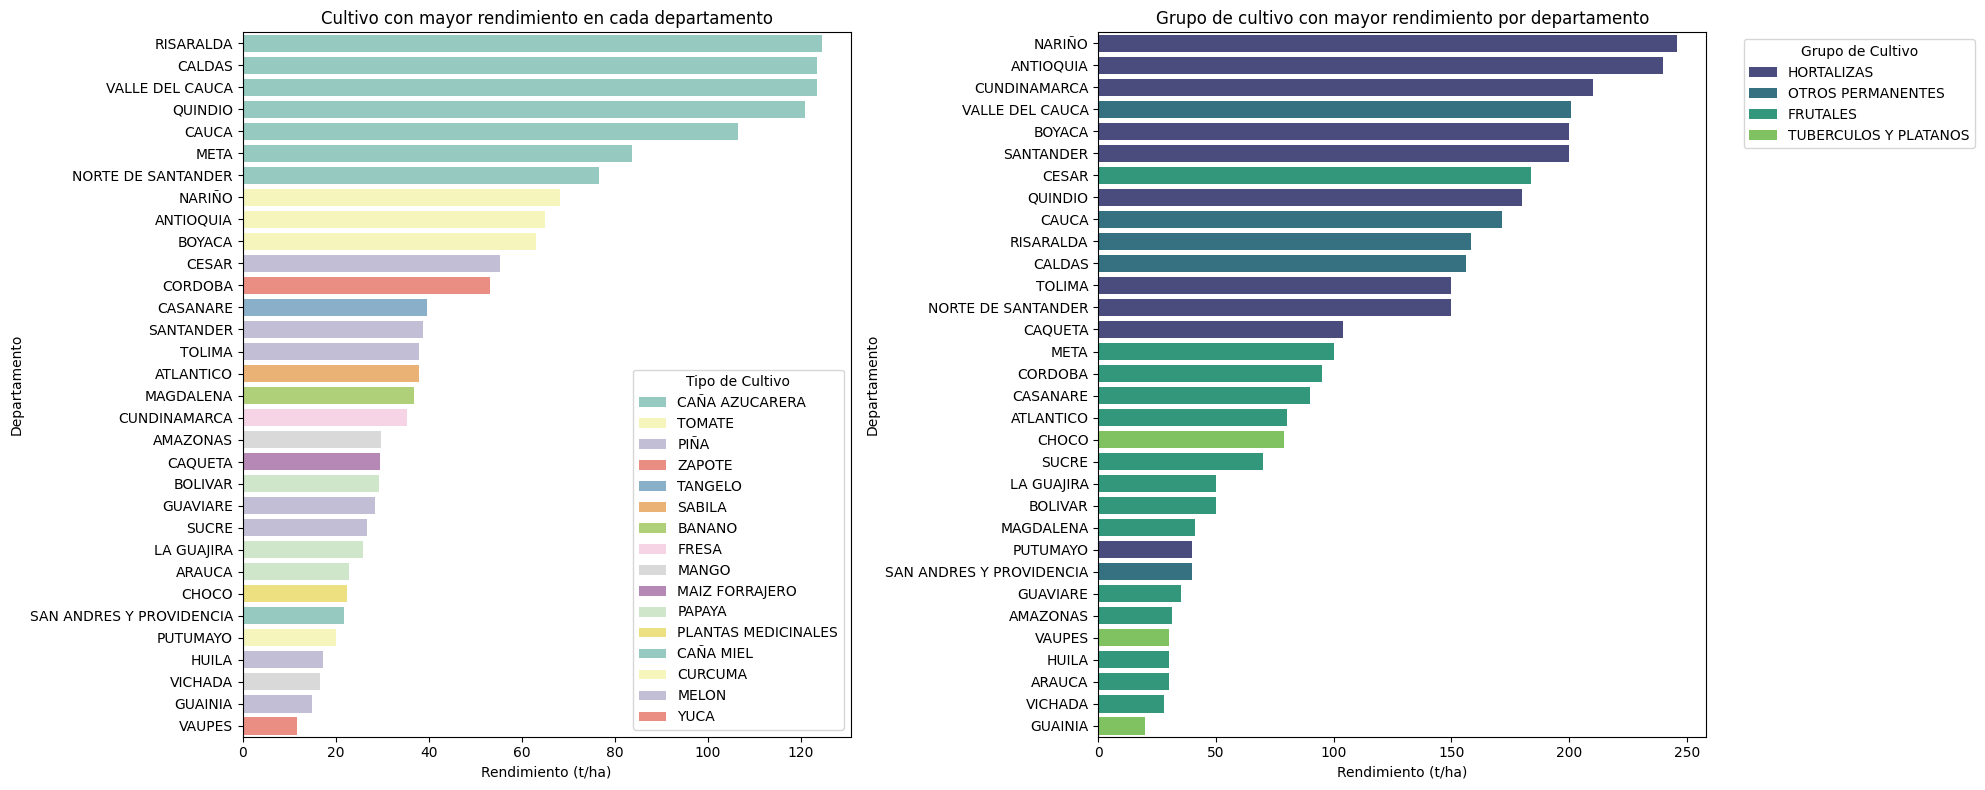

In [13]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajustar el tamaño

# Gráfico 1: Cultivo con mayor rendimiento por departamento
sns.barplot(
    data=cultivo_max_rendimiento,
    x='Rendimiento\n(t/ha)',
    y='DEPARTAMENTO',
    hue='CULTIVO',
    dodge=False,
    palette='Set3',
    ax=axes[0]  # Asignar al primer subgráfico
)
axes[0].set_xlabel('Rendimiento (t/ha)')
axes[0].set_ylabel('Departamento')
axes[0].set_title('Cultivo con mayor rendimiento en cada departamento')
axes[0].legend(title='Tipo de Cultivo')

# Gráfico 2: Grupo de cultivo con mayor rendimiento por departamento
sns.barplot(
    data=cultivo_max_rendimiento02,
    x='Rendimiento\n(t/ha)',
    y='DEPARTAMENTO',
    hue='GRUPO \nDE CULTIVO',
    palette='viridis',
    ax=axes[1]  # Asignar al segundo subgráfico
)
axes[1].set_xlabel('Rendimiento (t/ha)')
axes[1].set_ylabel('Departamento')
axes[1].set_title('Grupo de cultivo con mayor rendimiento por departamento')
axes[1].legend(title='Grupo de Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Análisis de tendencias temporales en la producción agrícola

Es esencial examinar las tendencias temporales de cada grupo de cultivos para identificar patrones relevantes, comprender su evolución y formular preguntas clave sobre las posibles causas de estos comportamientos.



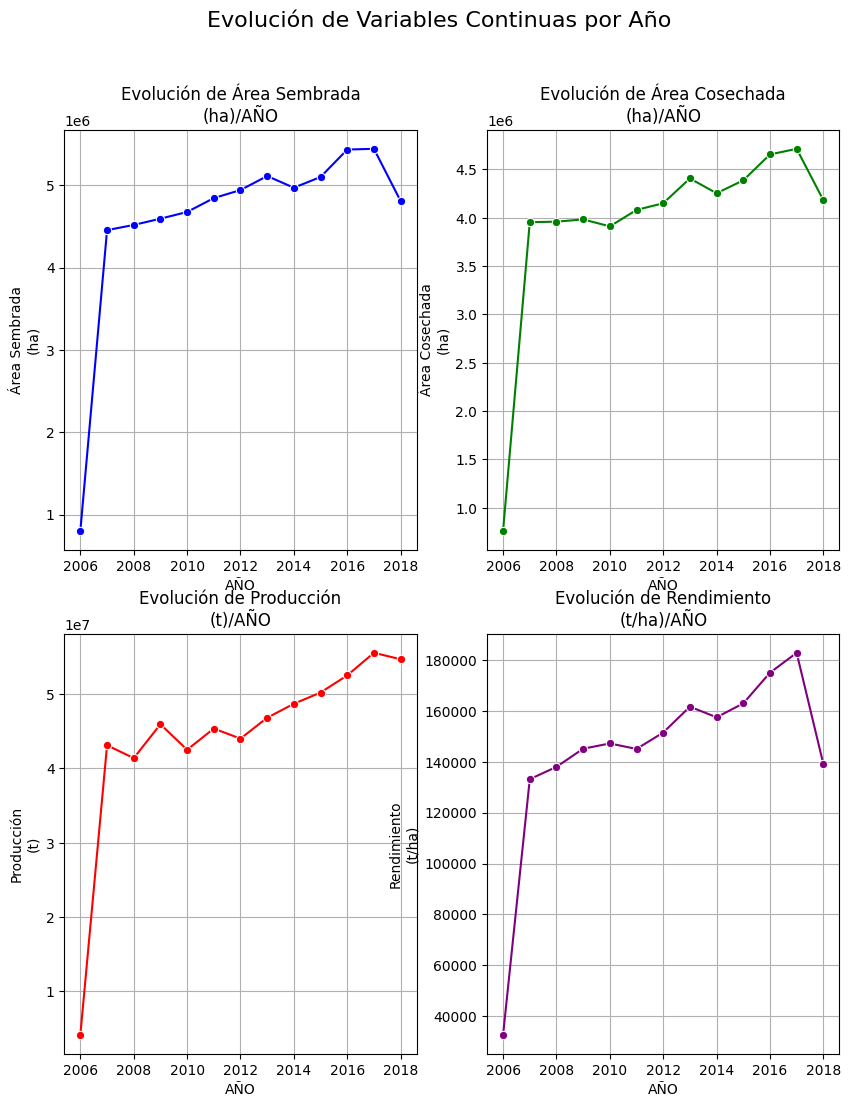

In [14]:

variables_continuas = ["Área Sembrada\n(ha)","Área Cosechada\n(ha)","Producción\n(t)","Rendimiento\n(t/ha)"]
# Agregar la producción total por año
produccion_anual = Datos02.groupby("AÑO")[variables_continuas].sum().reset_index()

# Lista de colores para cada gráfico
line_colors = ['blue', 'green', 'red', 'purple']

# Crear una cuadrícula 2x2 de subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))
axes = axes.flatten()  # Convertir la matriz de ejes en un vector para iterar

# Iterar y trazar cada gráfico en su celda
for i, var in enumerate(variables_continuas):
    sns.lineplot(data=produccion_anual, x='AÑO', y=var, marker='o', ax=axes[i], color=line_colors[i])
    axes[i].set_title(f'Evolución de {var}/AÑO')
    axes[i].set_xlabel('AÑO')
    axes[i].set_ylabel(var)
    axes[i].grid(True)

fig.suptitle('Evolución de Variables Continuas por Año', fontsize=16)
plt.show()

In [15]:
def graficar_tendencia_por_grupo(df):
    """
    Genera gráficos de tendencias de producción anual para cada 'GRUPO DE CULTIVO'.
    """
    # Obtener grupos de cultivo únicos
    grupos_cultivo = Datos02["GRUPO \nDE CULTIVO"].unique()

    # Crear gráficos por cada grupo de cultivo
    for grupo in grupos_cultivo:
        # Filtrar datos por grupo de cultivo
        df_grupo = Datos02[Datos02["GRUPO \nDE CULTIVO"] == grupo]

        # Agrupar por año y calcular la producción total por año
        produccion_anual = df_grupo.groupby("AÑO")["Producción\n(t)"].sum().reset_index()

        # Graficar
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=produccion_anual, x="AÑO", y="Producción\n(t)", marker="o", linewidth=2)
        plt.title(f"Tendencia de Producción - {grupo}")
        plt.xlabel("Año")
        plt.ylabel("Producción (t)")
        plt.grid()
        plt.xticks(rotation=45)  # Rotar etiquetas del eje X si hay muchos años
        plt.show()


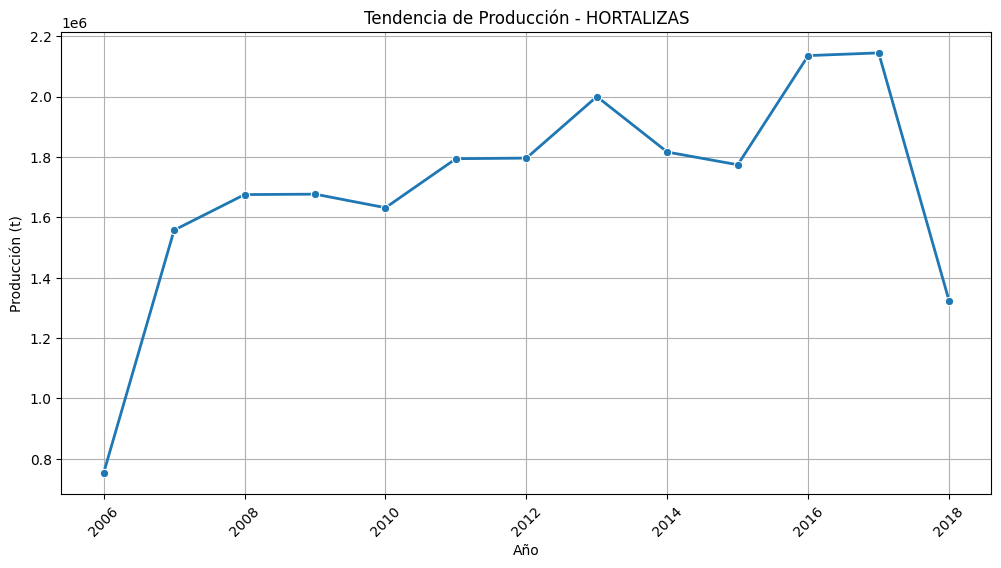

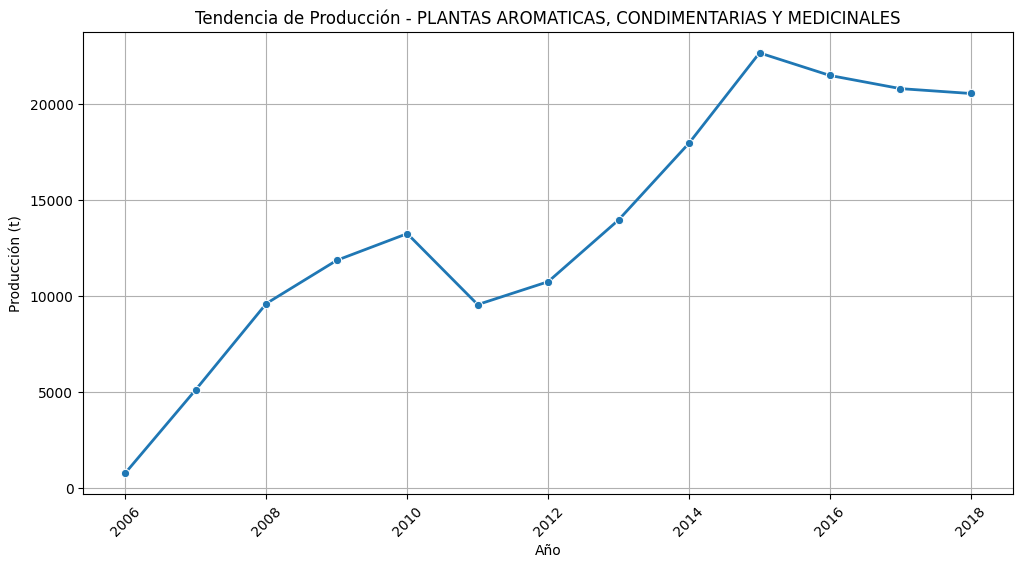

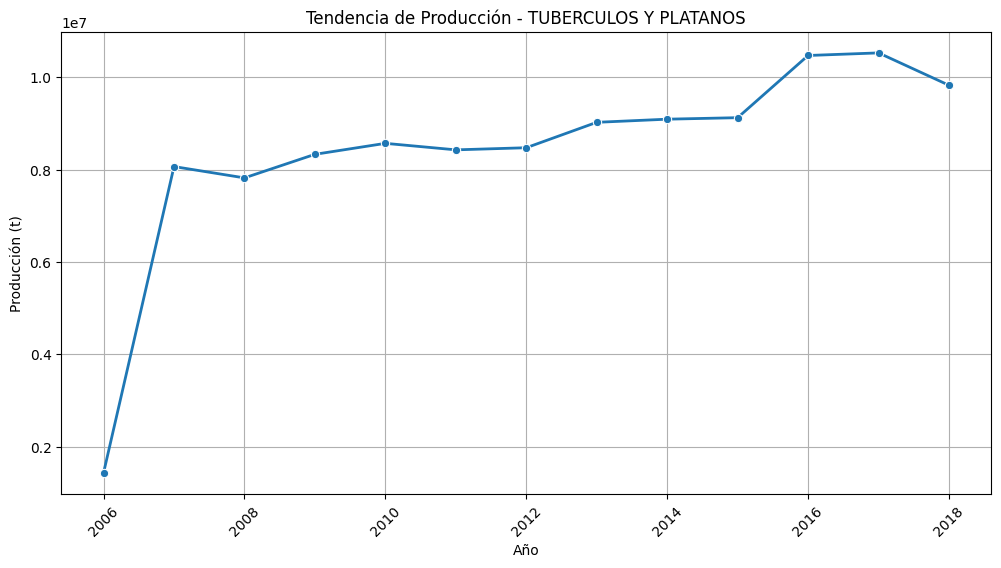

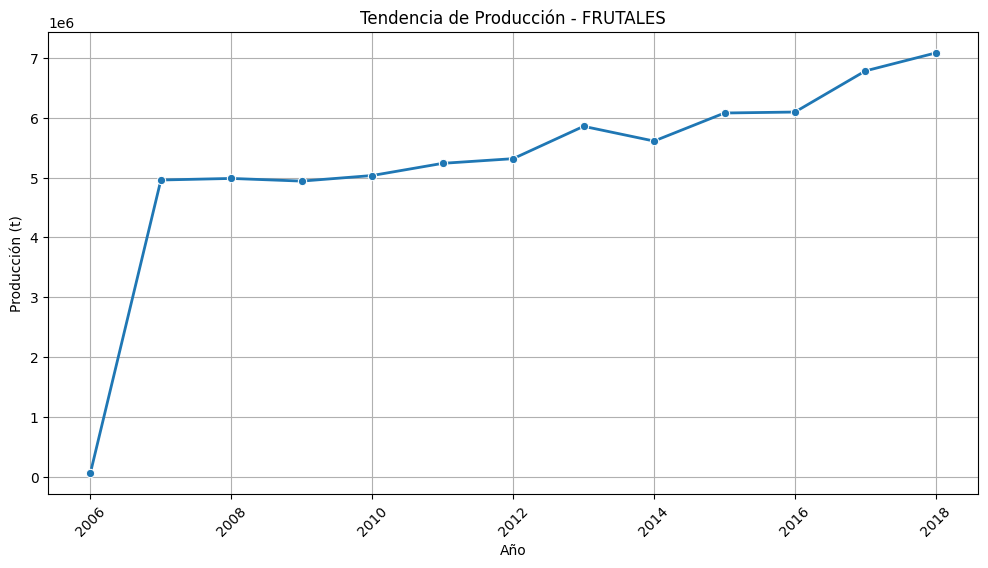

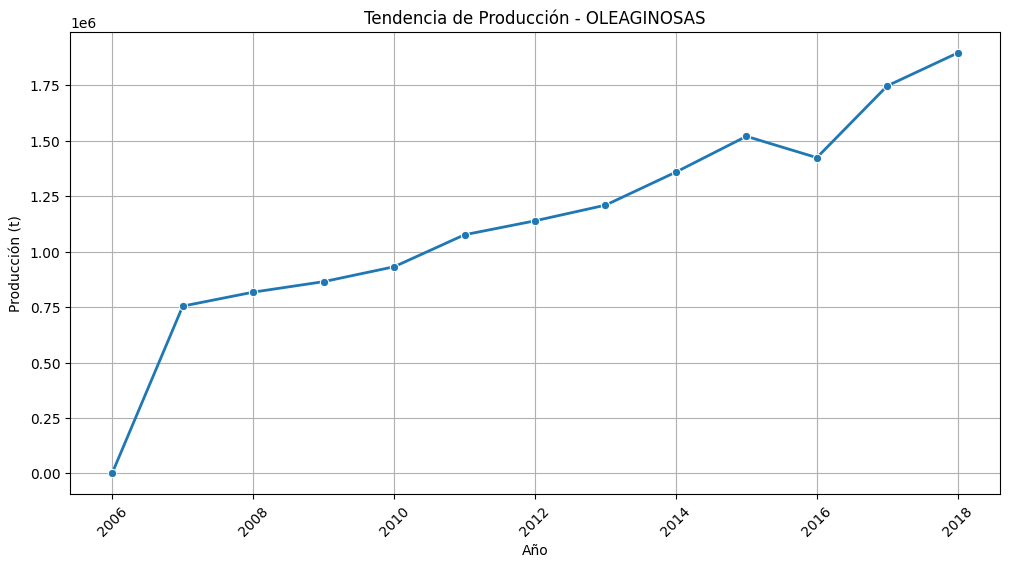

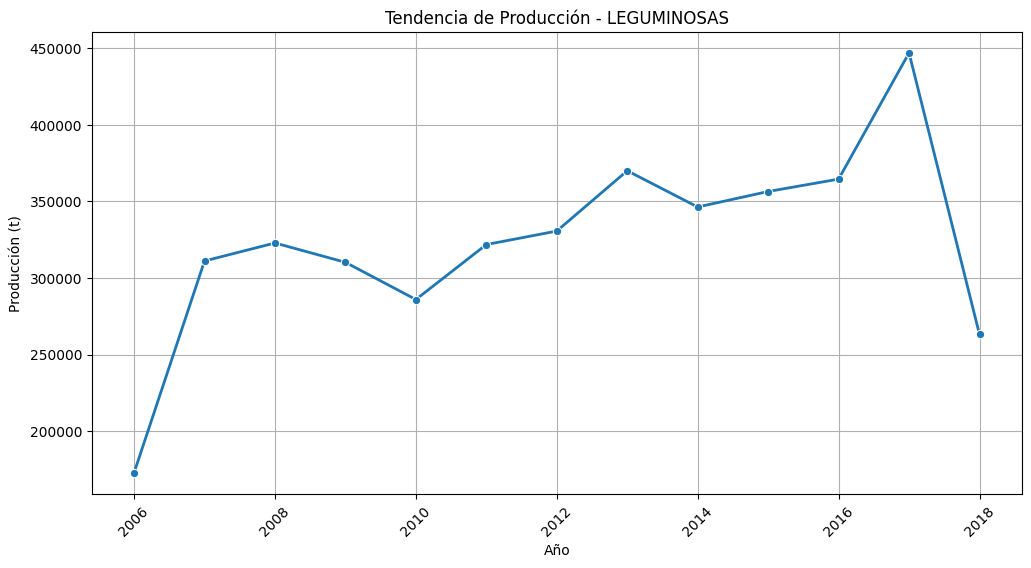

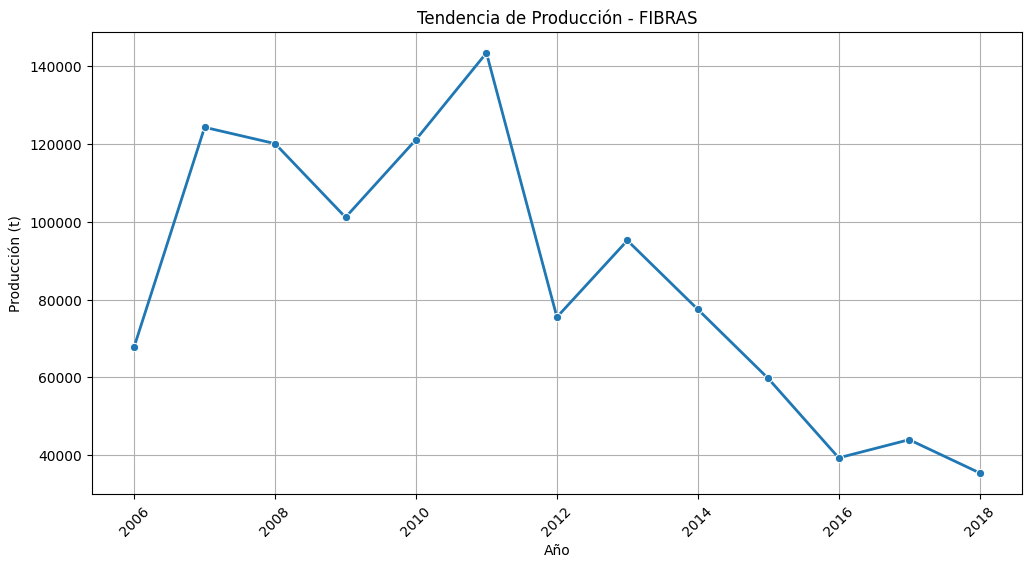

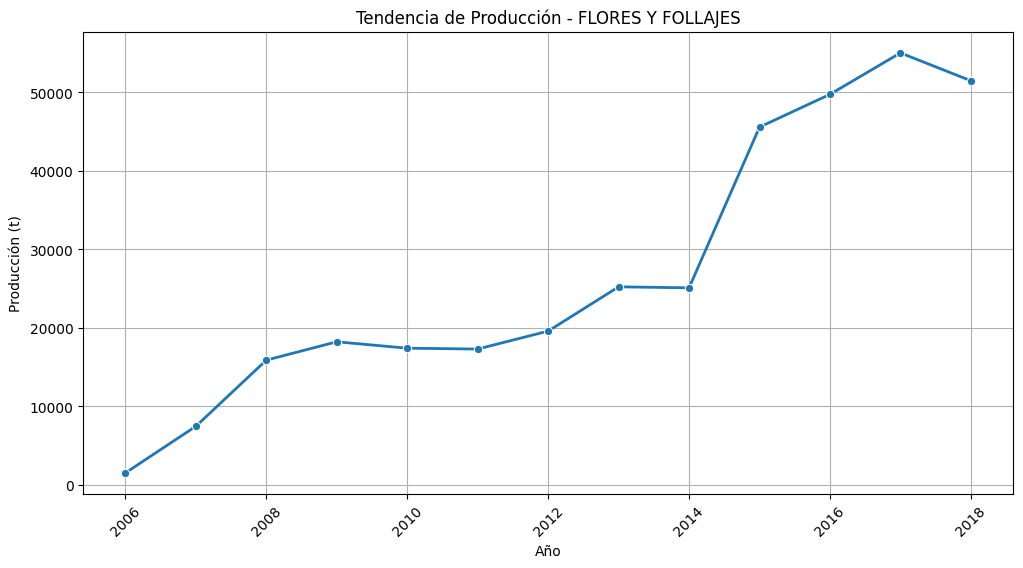

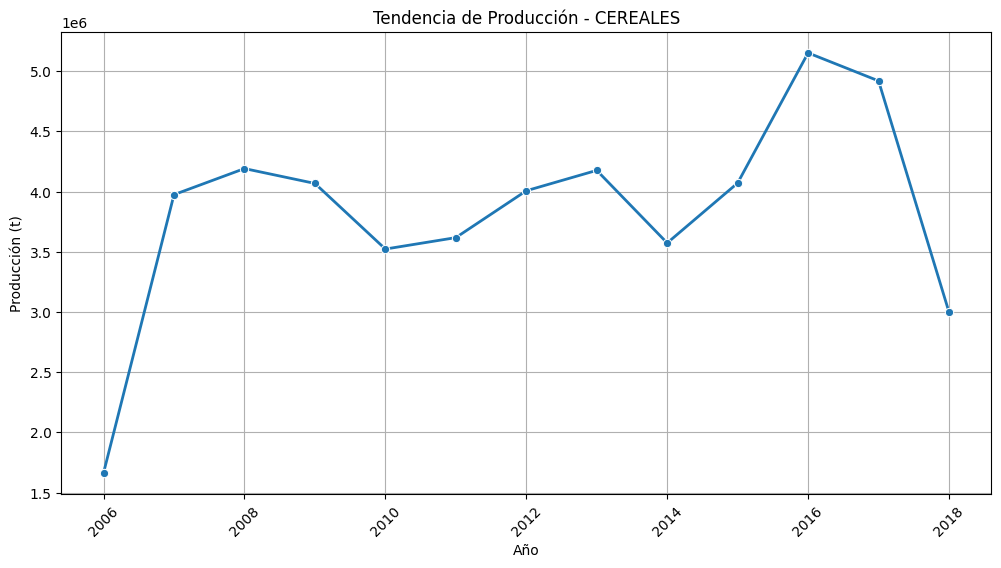

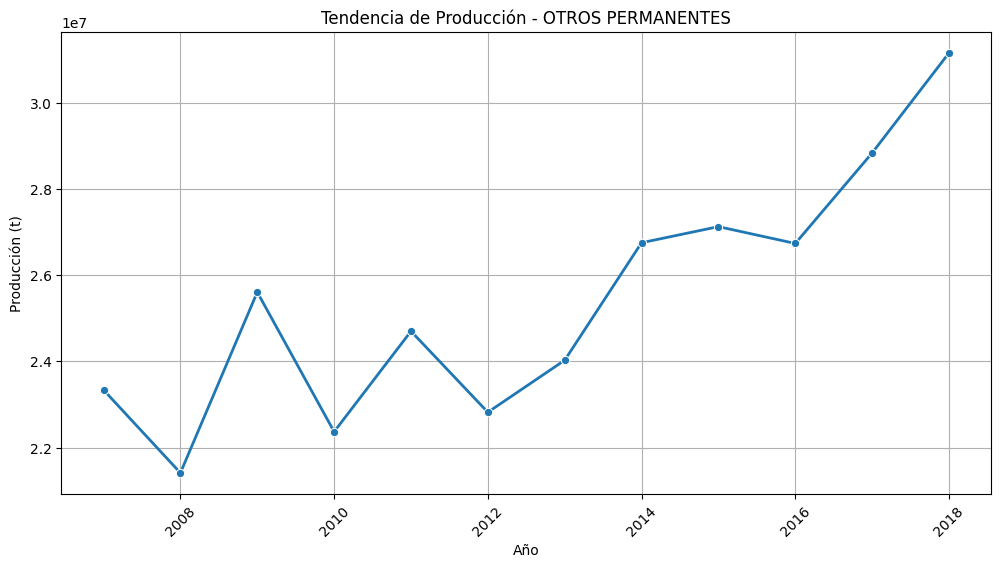

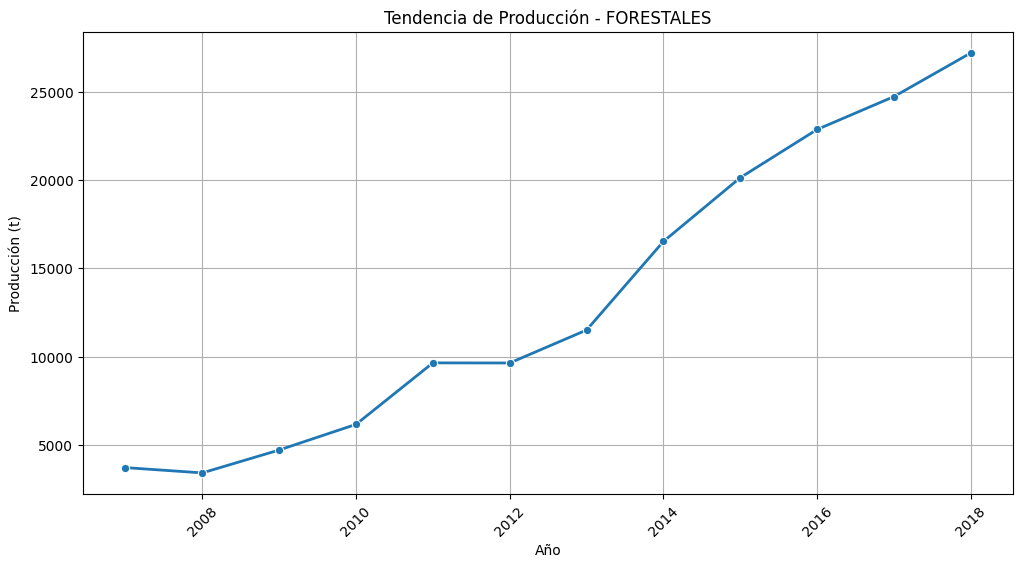

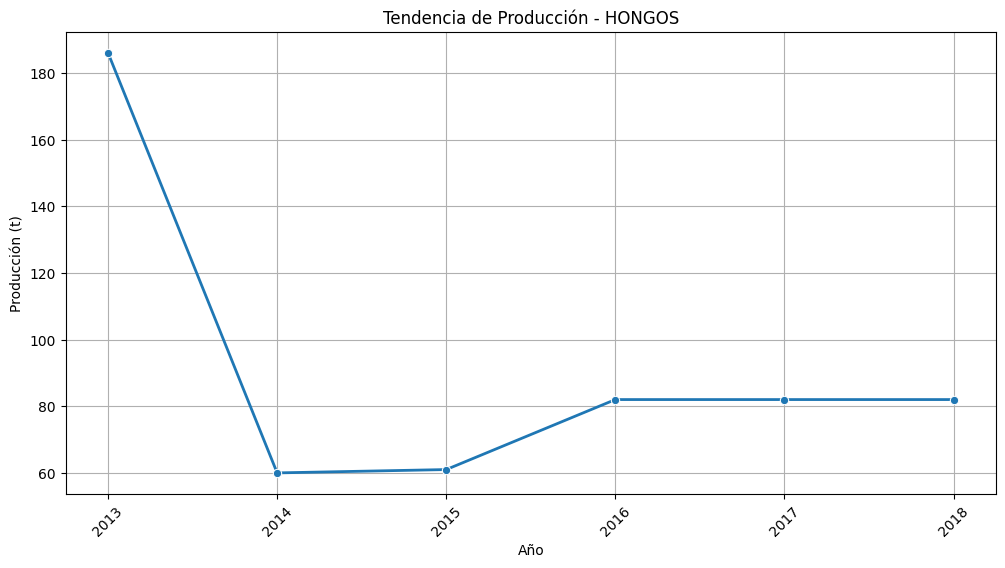

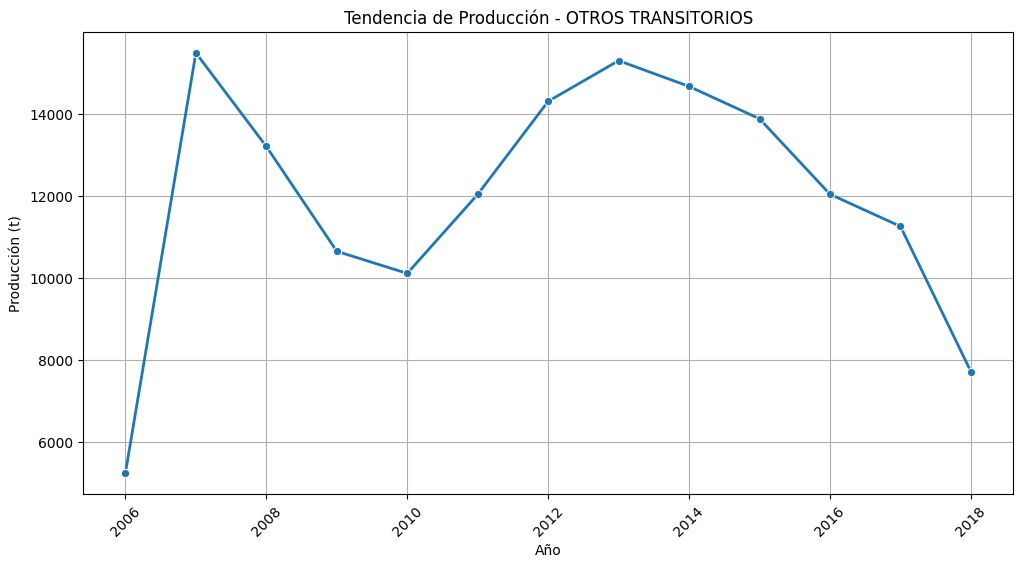

In [16]:
graficar_tendencia_por_grupo(Datos02)

# Correlación entre variables continuas y su impacto en la producción

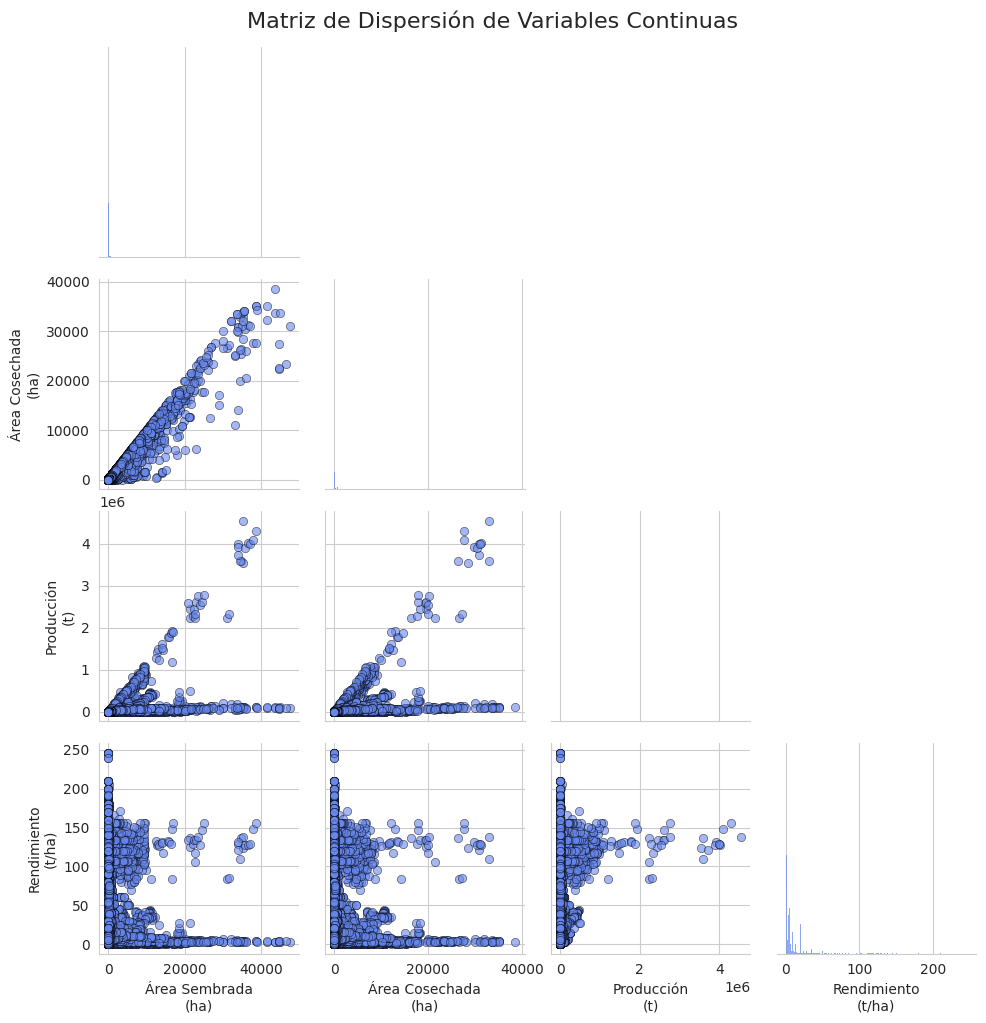

In [17]:
# Configurar estilo y colores
sns.set_style("whitegrid")  # Fondo más limpio
sns.set_palette("coolwarm")  # Colores llamativos

# Crear pairplot con mejoras
sns.pairplot(
  Datos02[variables_continuas],
  corner=True,  # Solo muestra la parte inferior
  height=2.5,  # Ajusta el tamaño de las celdas
  plot_kws={"alpha": 0.6, "edgecolor": "k"}  # Transparencia y bordes en puntos
)

# Mejorar el título general
plt.suptitle('Matriz de Dispersión de Variables Continuas', fontsize=16, y=1.02)

# Mostrar gráfico
plt.show()

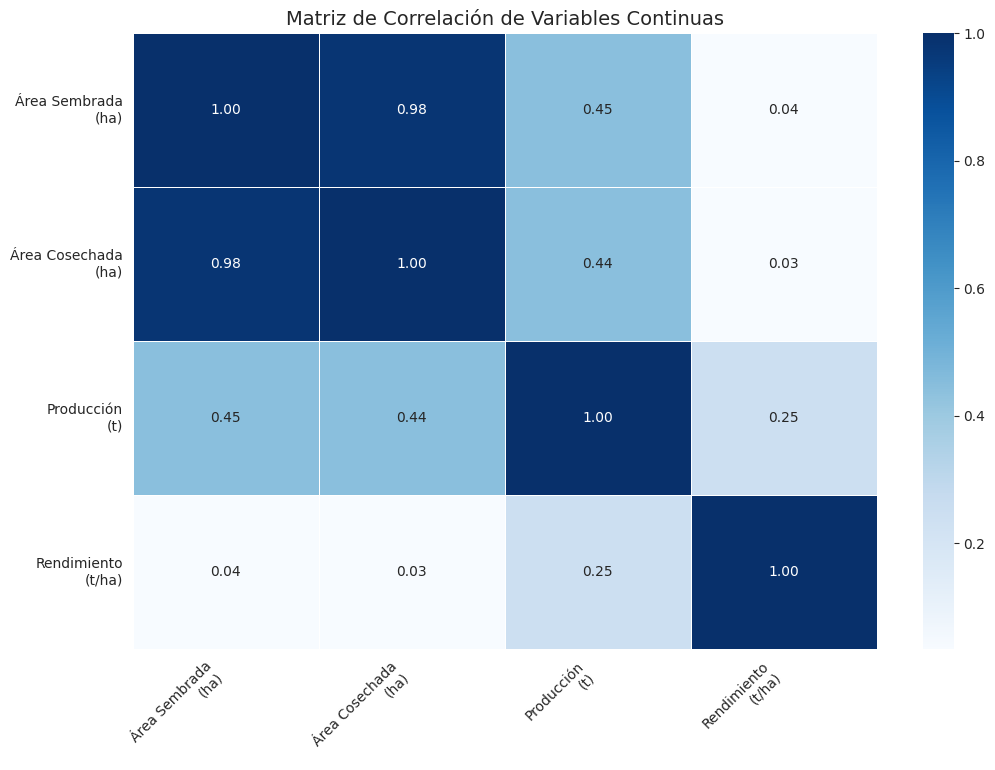

In [18]:
corr_matriz = Datos02[variables_continuas].corr()
plt.figure(figsize=(12, 8))  # Hacerlo más ancho
sns.heatmap(
    corr_matriz,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,  # Separación entre celdas
    annot_kws={"size": 10}  # Tamaño de las anotaciones
)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X
plt.yticks(rotation=0)  # Mantener etiquetas del eje Y horizontales
plt.title("Matriz de Correlación de Variables Continuas", fontsize=14)
plt.show()

# Identificación de los cultivos con mayor producción por departamento

<Figure size 1200x600 with 0 Axes>

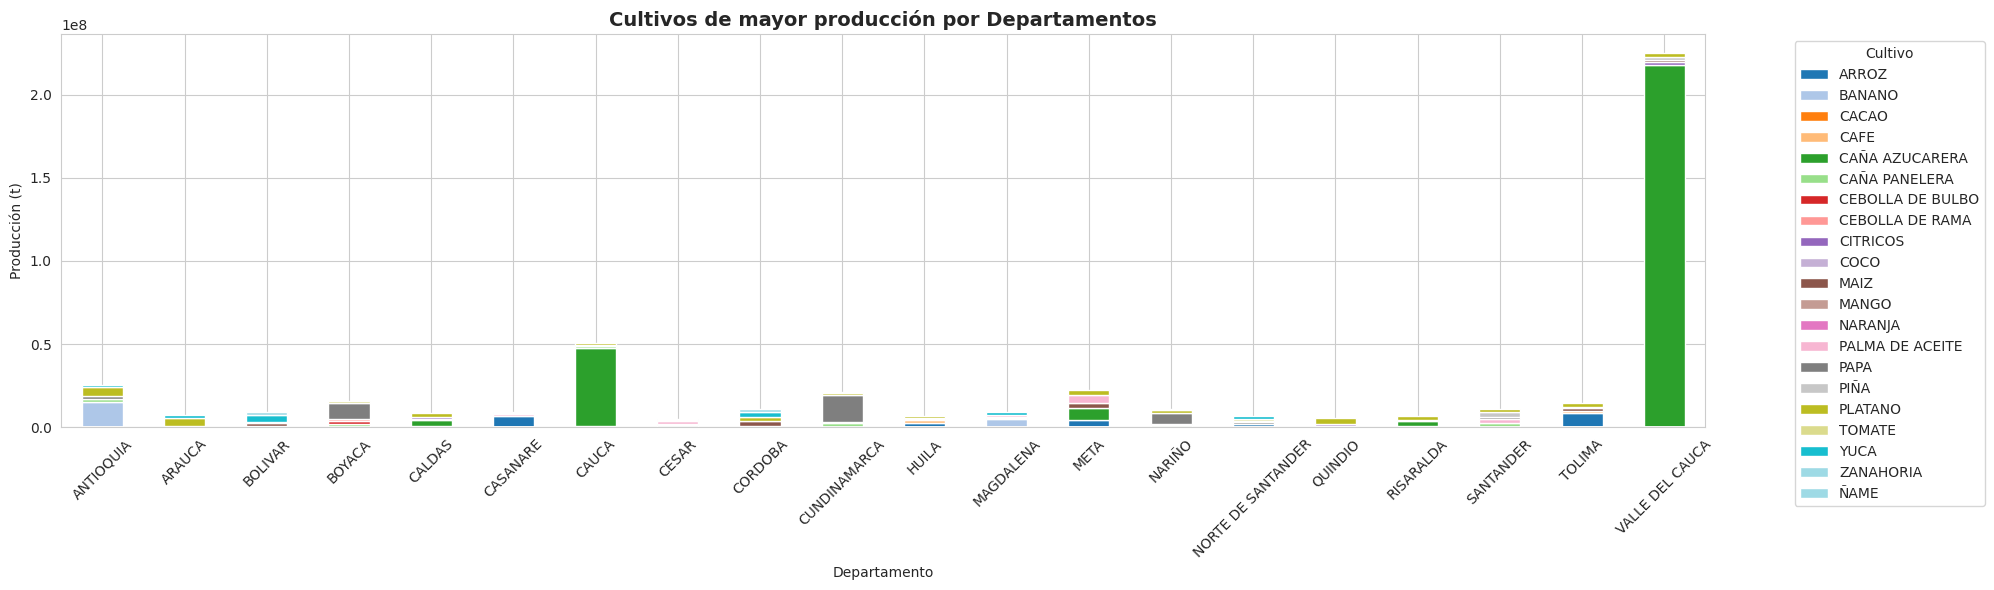

In [41]:
# Identificar los 20 departamentos con mayor producción total
top_departamentos = Datos02.groupby("DEPARTAMENTO")["Producción\n(t)"].sum().nlargest(20).index

# Filtrar el DataFrame para conservar solo los registros de los 20 departamentos con mayor producción
df_top_departamentos = Datos02[Datos02["DEPARTAMENTO"].isin(top_departamentos)]

# Agrupar los datos por departamento y cultivo, sumando la producción total
df_filtered = df_top_departamentos.groupby(["DEPARTAMENTO", "CULTIVO"])["Producción\n(t)"].sum().reset_index()

# Ordenar los datos dentro de cada departamento en orden descendente de producción
df_filtered = df_filtered.sort_values(["DEPARTAMENTO", "Producción\n(t)"], ascending=[True, False])

# Asignar un ranking a los cultivos dentro de cada departamento según su producción
df_filtered["rank"] = df_filtered.groupby("DEPARTAMENTO")["Producción\n(t)"].rank(method="first", ascending=False)

# Filtrar solo los 5 cultivos más productivos en cada departamento
df_filtered = df_filtered[df_filtered["rank"] <= 5]

# Configurar el tamaño de la figura para la visualización del gráfico
plt.figure(figsize=(12, 6))

# Crear una tabla pivotante con departamentos como índices y cultivos como columnas
df_pivot = df_filtered.pivot(index="DEPARTAMENTO", columns="CULTIVO", values="Producción\n(t)").fillna(0)

# Generar un gráfico de barras apiladas con una paleta de colores variada
df_pivot.plot(kind="bar", stacked=True, colormap="tab20", figsize=(20, 6))

# Configurar etiquetas y títulos del gráfico
plt.title("Cultivos de mayor producción por Departamentos", fontsize=14, fontweight="bold")
plt.xlabel("Departamento")
plt.ylabel("Producción (t)")
plt.xticks(rotation=45)
plt.legend(title="Cultivo", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar el diseño para mejorar la visualización y mostrar el gráfico
plt.tight_layout()
plt.show()

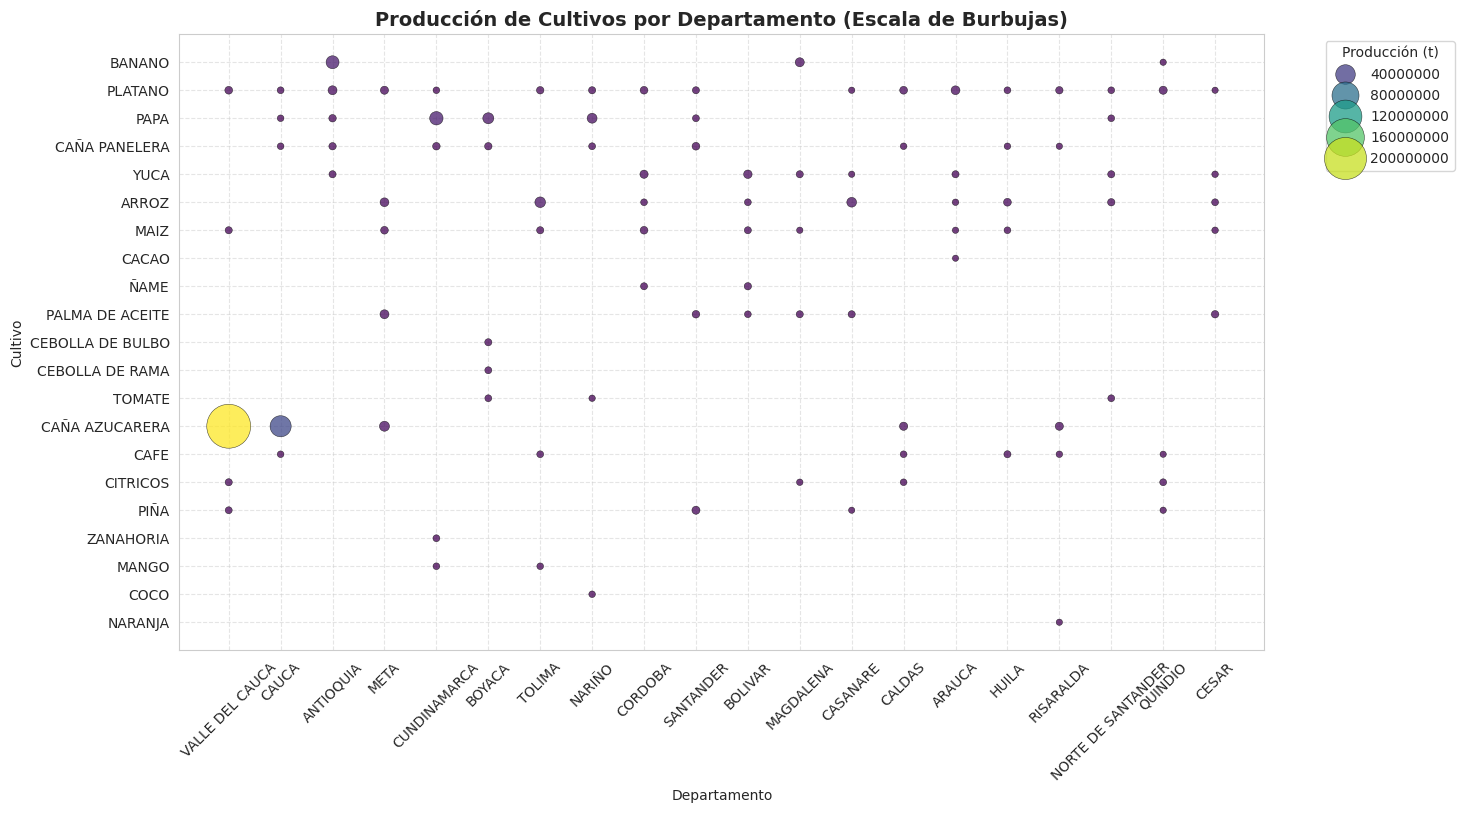

In [34]:
plt.figure(figsize=(14, 8))

# Crear el gráfico de burbujas
sns.scatterplot(
    data=df_filtered,
    x="DEPARTAMENTO",
    y="CULTIVO",
    size="Producción\n(t)",
    hue="Producción\n(t)",
    palette="viridis",
    sizes=(20, 1000),
    edgecolor="black",
    alpha=0.75
)

# Ajustar etiquetas y título
plt.title("Producción de Cultivos por Departamento (Escala de Burbujas)", fontsize=14, fontweight="bold")
plt.xlabel("Departamento")
plt.ylabel("Cultivo")
plt.xticks(rotation=45)
plt.legend(title="Producción (t)", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Comparación entre área cultivada y área sembrada

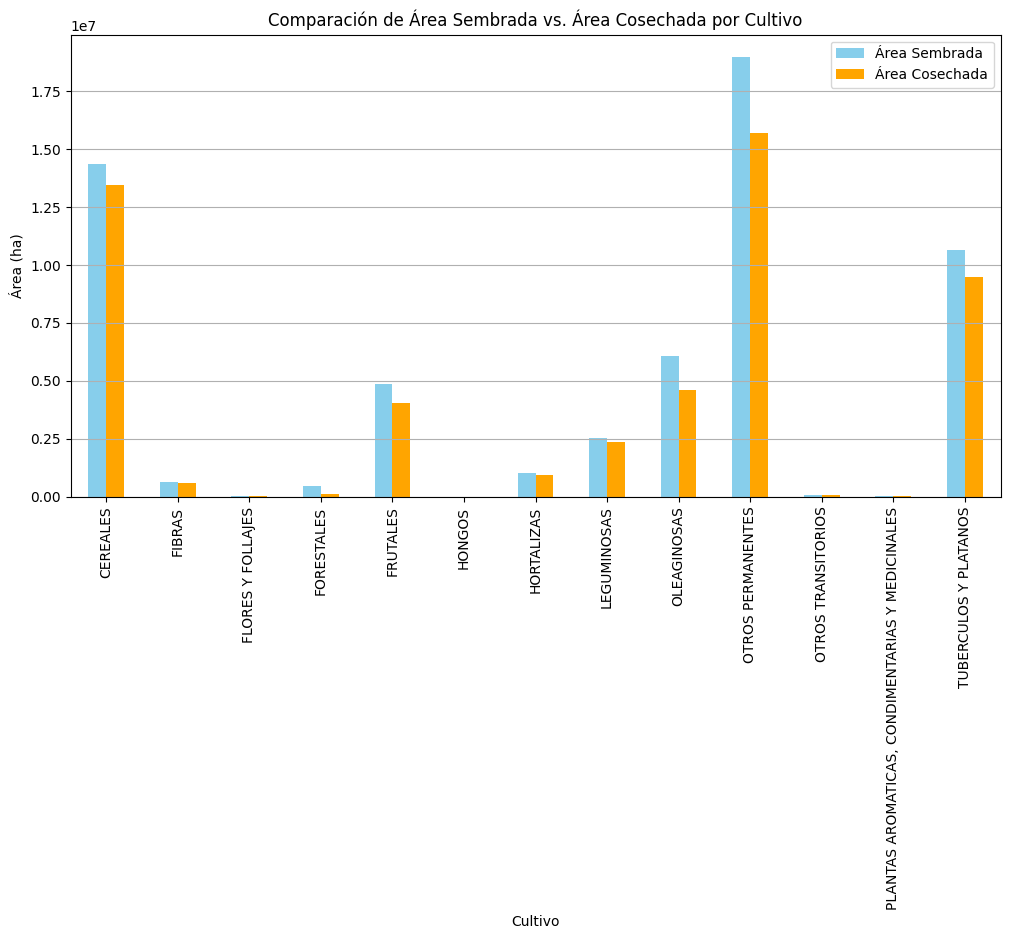

In [ ]:
# Agrupar por cultivo y sumar áreas
df_cultivos = Datos02.groupby("GRUPO \nDE CULTIVO")[["Área Sembrada\n(ha)", "Área Cosechada\n(ha)"]].sum().reset_index()

# Gráfico de barras agrupadas
df_cultivos.plot(x="GRUPO \nDE CULTIVO", kind="bar", figsize=(12, 6), color=["skyblue", "orange"])

plt.title("Comparación de Área Sembrada vs. Área Cosechada por Cultivo")
plt.xlabel("Cultivo")
plt.ylabel("Área (ha)")
plt.xticks(rotation=90)
plt.legend(["Área Sembrada", "Área Cosechada"])
plt.grid(axis="y")
plt.show()